In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [4]:
# Loading the data of fanshion_mnis
(x_train_full, y_train_full),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [5]:
x_train_full.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_valid, x_train=x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]
x_test=x_test/255

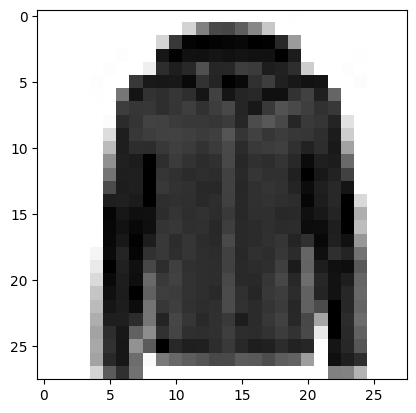

In [7]:
plt.imshow(x_train[0], cmap='binary')

<Axes: >

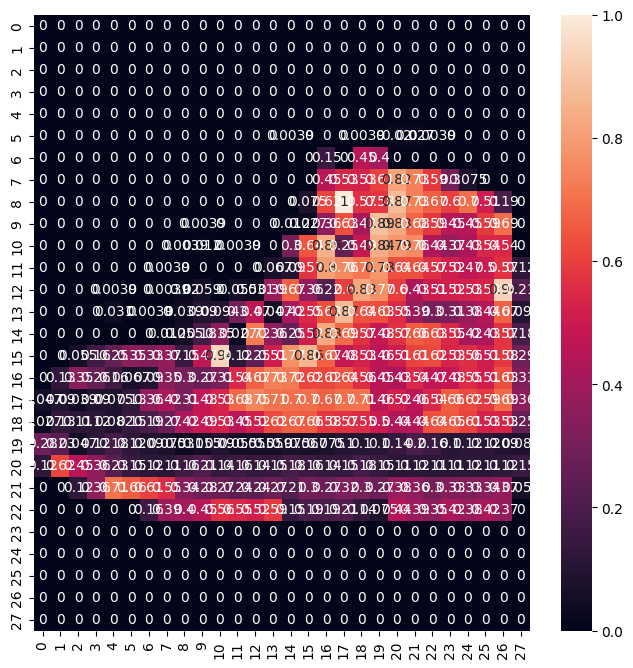

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(x_train[2], annot=True)

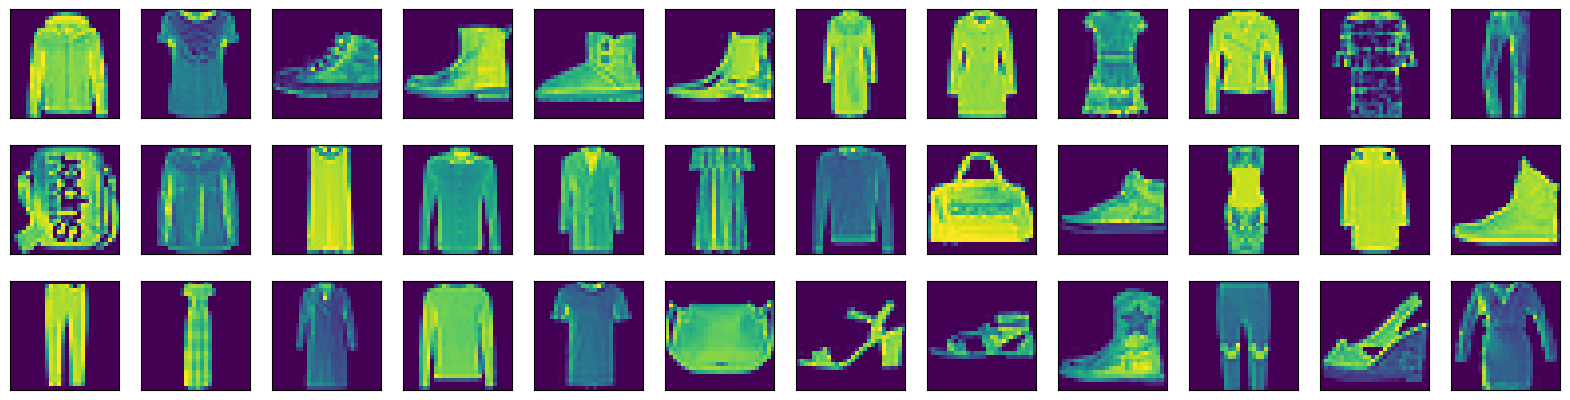

In [9]:
fig=plt.figure(figsize=(20,5))
for i in range(36):
  ax=fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i])

## Without using Batch Normalization

In [10]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]

In [11]:
Model_BN=tf.keras.models.Sequential(LAYERS)

In [12]:
Model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
OPTIMIZER="sgd"
LOSS="sparse_categorical_crossentropy"
metrics=['accuracy']

In [14]:
Model_BN.compile(optimizer=OPTIMIZER,
                 loss=LOSS,
                 metrics=metrics
                 )

In [15]:
Model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
start=time.time()
history=Model_BN.fit(x_train, y_train,epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7080 - accuracy: 0.7692 - val_loss: 0.5106 - val_accuracy: 0.8332
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4856 - accuracy: 0.8321 - val_loss: 0.4527 - val_accuracy: 0.8468
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4410 - accuracy: 0.8463 - val_loss: 0.4261 - val_accuracy: 0.8576
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4132 - accuracy: 0.8559 - val_loss: 0.3886 - val_accuracy: 0.8648
Epoch 5/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8630 - val_loss: 0.3731 - val_accuracy: 0.8692
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3770 - accuracy: 0.8668 - val_loss: 0.3712 - val_accuracy: 0.8720
Epoch 7/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3524 - val_accuracy:

In [17]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.707994,0.769236,0.510598,0.8332
1,0.485584,0.832073,0.452730,0.8468
2,0.441009,0.846273,0.426096,0.8576
3,0.413227,0.855873,0.388568,0.8648
4,0.393046,0.862982,0.373091,0.8692
5,0.377016,0.866818,0.371171,0.8720
6,0.363087,0.871636,0.352414,0.8774
7,0.352246,0.873164,0.347552,0.8766
8,0.341515,0.877545,0.342897,0.8836
9,0.331729,0.881382,0.342826,0.8794


<Axes: >

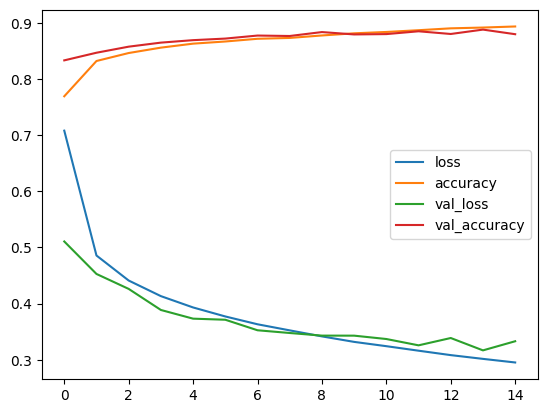

In [18]:
pd.DataFrame(history.history).plot()

## NOW Applying BatchNormalization

In [19]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
]

In [20]:
Model_BN2=tf.keras.models.Sequential(LAYERS)

In [21]:
Model_BN2.compile(optimizer=OPTIMIZER,
                 loss=LOSS,
                 metrics=metrics
                 )

In [22]:
Model_BN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [23]:
784*2*2+300*2*2+100*2*2  # half of parameter are non-trainable parameter (alpha, and beta) - Trainable parameter are mean and st.deviation.

4736

In [24]:
history_2=Model_BN2.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5324 - accuracy: 0.8160 - val_loss: 0.3788 - val_accuracy: 0.8688
Epoch 2/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3912 - accuracy: 0.8601 - val_loss: 0.3492 - val_accuracy: 0.8762
Epoch 3/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3500 - accuracy: 0.8735 - val_loss: 0.3278 - val_accuracy: 0.8812
Epoch 4/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3238 - accuracy: 0.8826 - val_loss: 0.3225 - val_accuracy: 0.8834
Epoch 5/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3059 - accuracy: 0.8886 - val_loss: 0.3203 - val_accuracy: 0.8834
Epoch 6/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2881 - accuracy: 0.8951 - val_loss: 0.3235 - val_accuracy: 0.8838
Epoch 7/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2763 - accuracy: 0.8991 - val_loss: 0.3040 - val_accuracy

<Axes: >

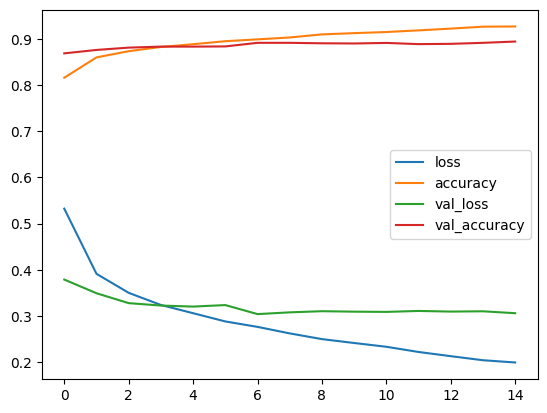

In [25]:
pd.DataFrame(history_2.history).plot()

In [28]:
Model_BN2.layers[0].trainable

True